# Shared Memory Analysis

In the following notebook a fast analysis of performance metrics of shared
memory versions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shared_memory_plot as plot

df = pd.read_csv("../results/forest.csv")
df = df[(df["backend"] != "mpi") & (df["backend"] != "joblib")]
df = df[(df["dataset"] == "magic") | (df["dataset"] == "susy20000")]
df = df.sort_values(by=["dataset", "threads"])
df

,dataset,estimators,max_depth,accuracy,f1,backend,nodes,threads,train_time,predict_time
660,magic,8,0,0.866456,0.846951,seq,1,1,1673.88,3.24038
661,magic,8,0,0.866456,0.846951,seq,1,1,1670.44,3.25143
662,magic,8,0,0.866456,0.846951,seq,1,1,1671.34,3.22954
663,magic,8,0,0.866456,0.846951,seq,1,1,1670.98,3.23051
664,magic,8,0,0.866456,0.846951,seq,1,1,1672.24,3.25865
...,...,...,...,...,...,...,...,...,...,...
1525,susy20000,256,0,0.784500,0.780939,ff,1,32,12470.70,17.29330
1526,susy20000,256,0,0.784500,0.780939,ff,1,32,12615.40,16.57890
1527,susy20000,256,0,0.784500,0.780939,ff,1,32,12634.90,16.83210
1528,susy20000,256,0,0.784500,0.780939,ff,1,32,12595.10,16.71360


Every simulation is replicated 5 times so is necessary to average the results.

In [2]:
INPUT_COLS = ["dataset", "estimators", "max_depth", "backend", "nodes", "threads"]
OUTPUT_COLS = ["accuracy", "f1", "train_time", "predict_time"]
df = df.groupby(by=INPUT_COLS, as_index=False)[OUTPUT_COLS].mean()
df

,dataset,estimators,max_depth,backend,nodes,threads,accuracy,f1,train_time,predict_time
0,magic,8,0,ff,1,2,0.866456,0.846951,923.7928,3.843046
1,magic,8,0,ff,1,4,0.866456,0.846951,470.2440,2.799124
2,magic,8,0,ff,1,8,0.866456,0.846951,239.5514,3.501910
3,magic,8,0,ff,1,16,0.866456,0.846951,239.5826,4.936698
4,magic,8,0,ff,1,32,0.866456,0.846951,239.7862,8.585598
...,...,...,...,...,...,...,...,...,...,...
127,susy20000,256,0,omp,1,4,0.784500,0.780939,28035.0000,38.028200
128,susy20000,256,0,omp,1,8,0.784500,0.780939,14143.0000,16.897700
129,susy20000,256,0,omp,1,16,0.784500,0.780939,7102.8800,8.989560
130,susy20000,256,0,omp,1,32,0.784500,0.780939,5077.2900,6.926930


## Execution Time

Below are reported the total execution time of each version on Magic and SUSY
datasets for both training and predict phases.

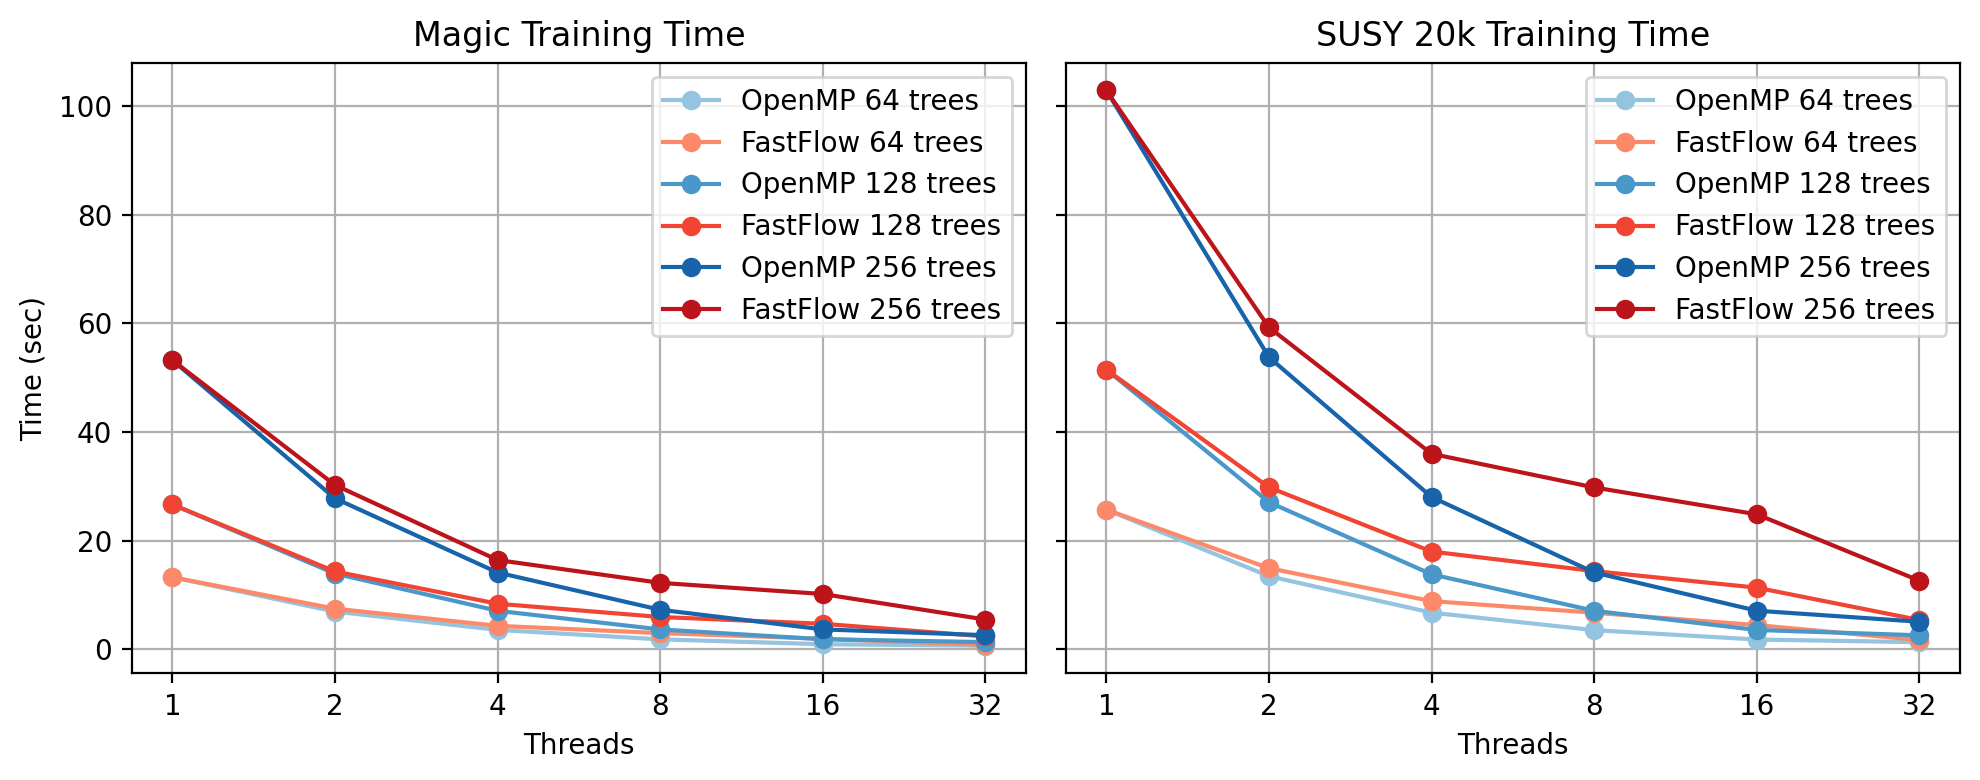

In [3]:
plot.training_runtime(df, 64)

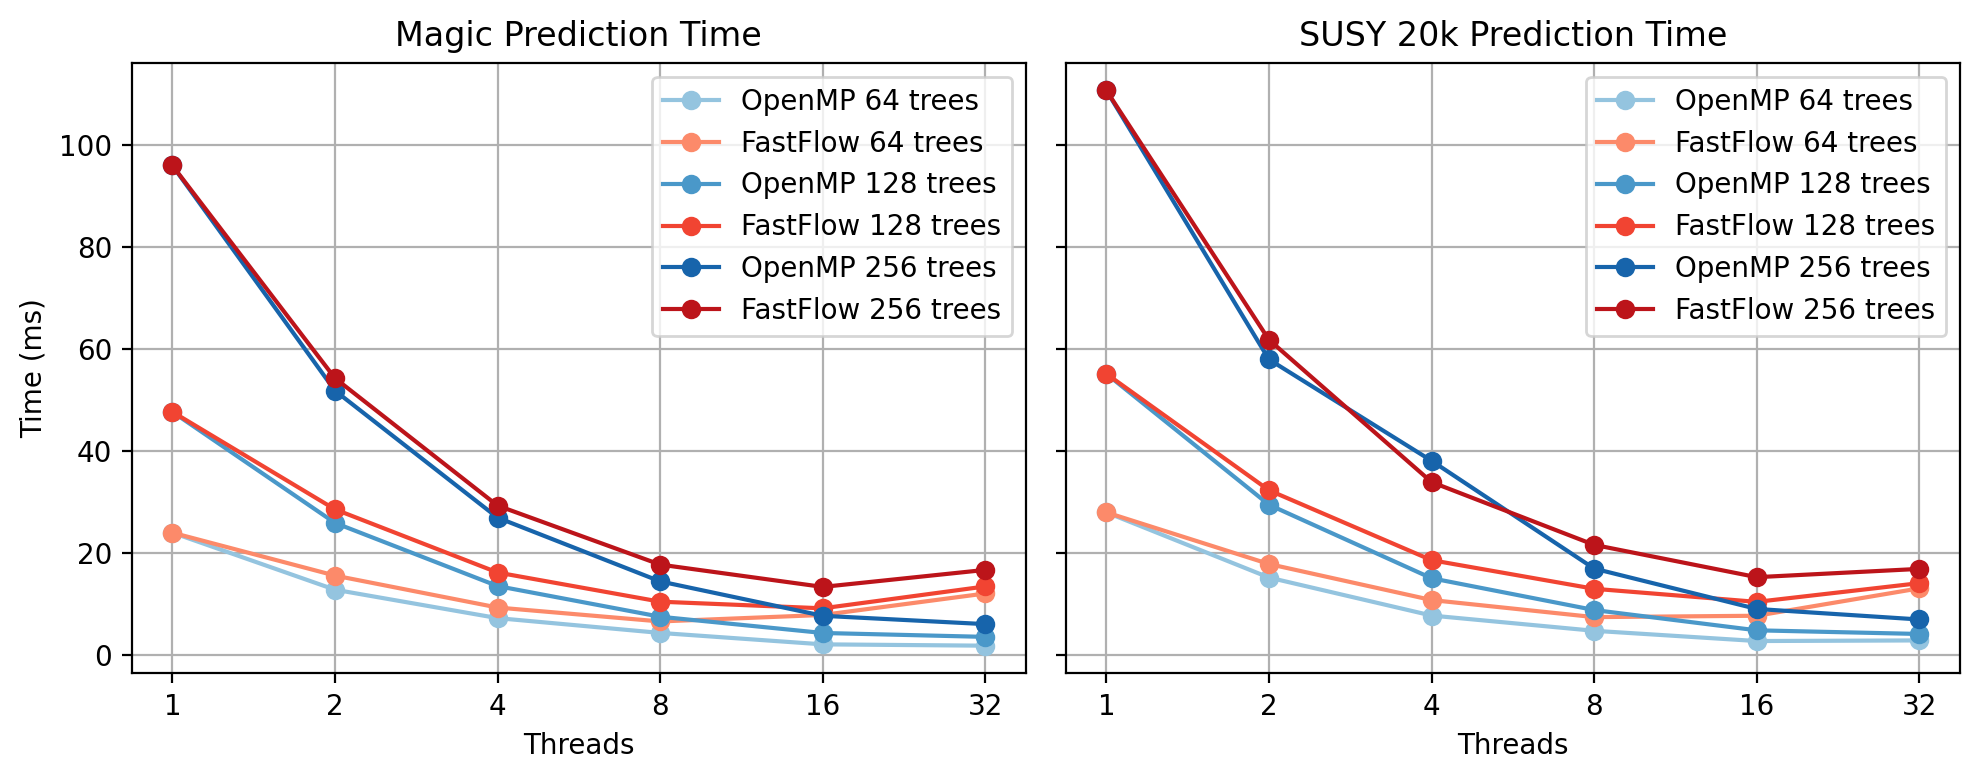

In [4]:
plot.prediction_runtime(df, 64)

## Speedup

Speedup is computed with respect to the sequential version.

In [5]:
seq = df[df["backend"] == "seq"]
seq

,dataset,estimators,max_depth,backend,nodes,threads,accuracy,f1,train_time,predict_time
10,magic,8,0,seq,1,1,0.866456,0.846951,1671.776,3.242102
21,magic,16,0,seq,1,1,0.870400,0.852071,3321.560,6.210764
32,magic,32,0,seq,1,1,0.875920,0.858581,6701.676,12.165040
43,magic,64,0,seq,1,1,0.879075,0.862176,13272.000,23.936340
54,magic,128,0,seq,1,1,0.873817,0.856364,26661.700,47.622820
65,magic,256,0,seq,1,1,0.878812,0.862193,53238.340,95.911500
76,susy20000,8,0,seq,1,1,0.772000,0.766350,3231.056,3.686886
87,susy20000,16,0,seq,1,1,0.778000,0.773399,6427.780,7.049952
98,susy20000,32,0,seq,1,1,0.781750,0.777497,12920.400,13.862240
109,susy20000,64,0,seq,1,1,0.784000,0.780515,25711.000,27.913780


In [6]:
merge_cols = ["dataset", "estimators", "max_depth"]
su = seq.merge(df, on=merge_cols, how="left")
df["train_speedup"] = su["train_time_x"] / su["train_time_y"]
df["predict_speedup"] = su["predict_time_x"] / su["predict_time_y"]
df

,dataset,estimators,max_depth,backend,nodes,threads,accuracy,f1,train_time,predict_time,train_speedup,predict_speedup
0,magic,8,0,ff,1,2,0.866456,0.846951,923.7928,3.843046,1.809687,0.843628
1,magic,8,0,ff,1,4,0.866456,0.846951,470.2440,2.799124,3.555125,1.158256
2,magic,8,0,ff,1,8,0.866456,0.846951,239.5514,3.501910,6.978778,0.925810
3,magic,8,0,ff,1,16,0.866456,0.846951,239.5826,4.936698,6.977869,0.656735
4,magic,8,0,ff,1,32,0.866456,0.846951,239.7862,8.585598,6.971944,0.377621
...,...,...,...,...,...,...,...,...,...,...,...,...
127,susy20000,256,0,omp,1,4,0.784500,0.780939,28035.0000,38.028200,3.670084,2.908663
128,susy20000,256,0,omp,1,8,0.784500,0.780939,14143.0000,16.897700,7.275034,6.545932
129,susy20000,256,0,omp,1,16,0.784500,0.780939,7102.8800,8.989560,14.485786,12.304406
130,susy20000,256,0,omp,1,32,0.784500,0.780939,5077.2900,6.926930,20.264905,15.968286


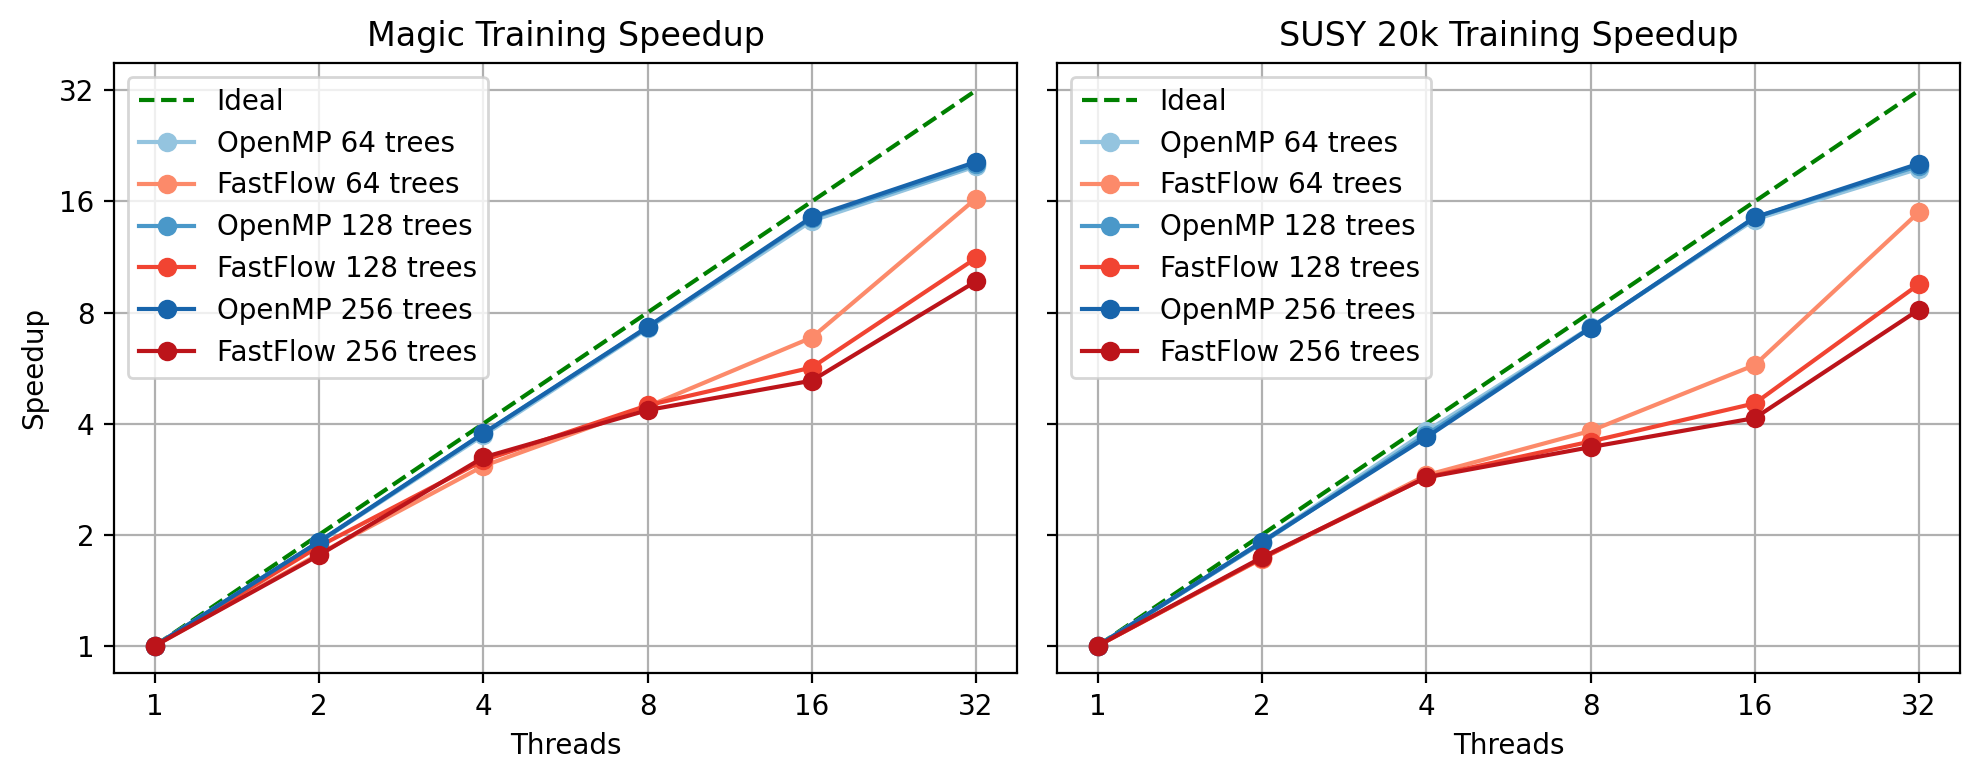

In [7]:
plot.training_speedup(df, 64)

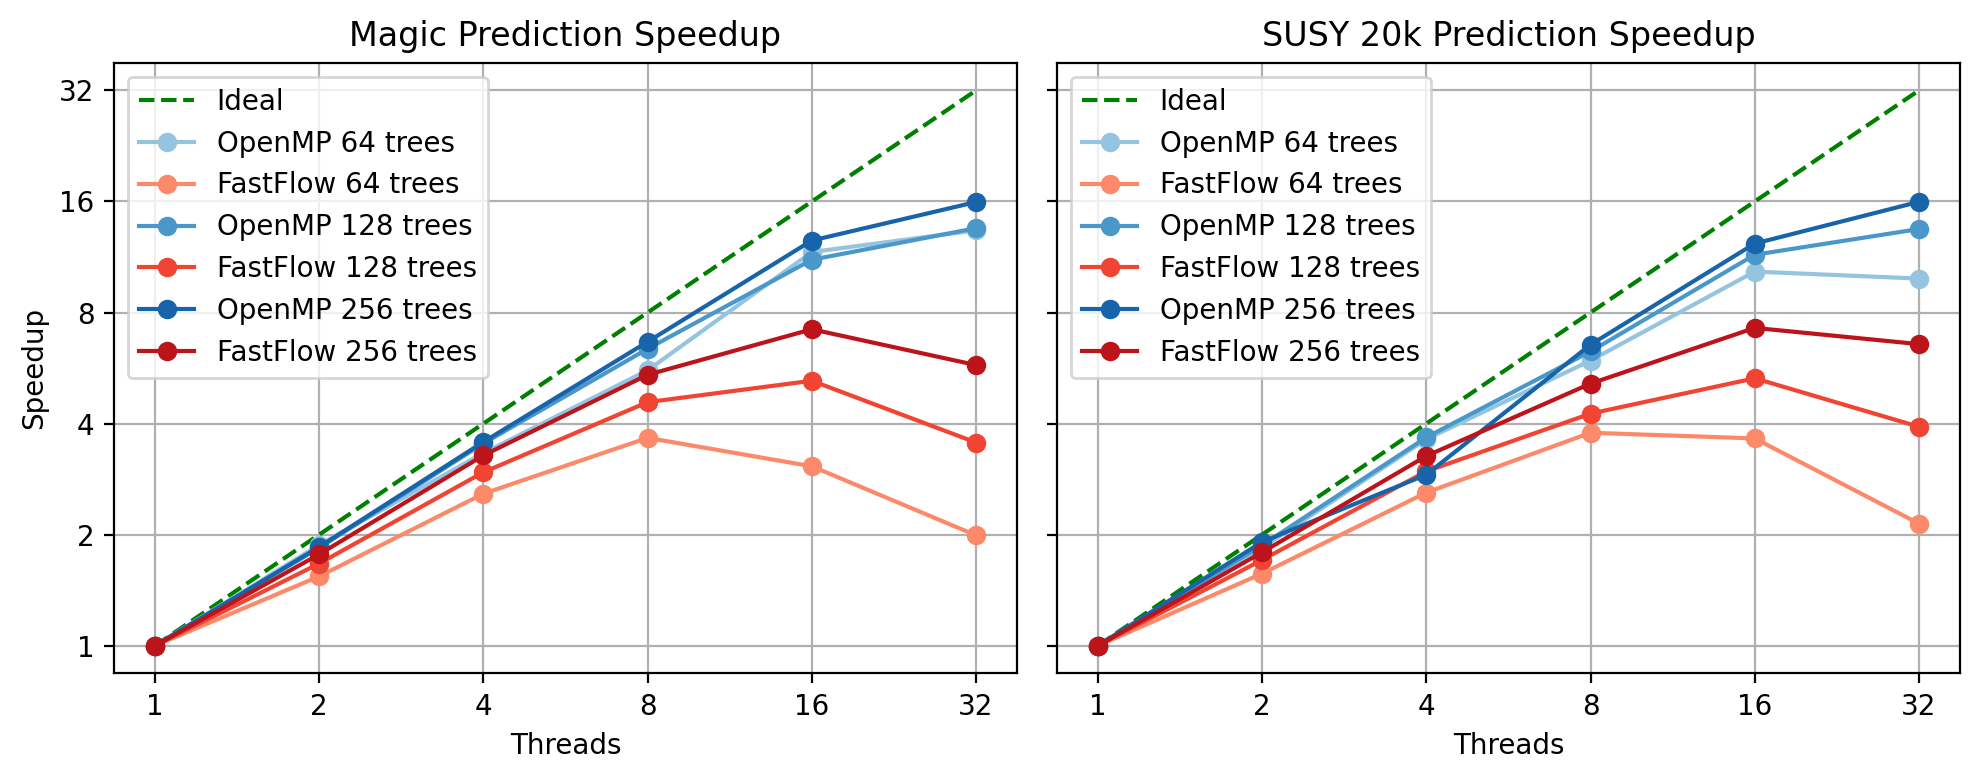

In [8]:
plot.prediction_speedup(df, 64)

## Efficiency

Efficiency is computed based on the number of cores/threads used.

In [9]:
df["train_efficiency"] = df["train_speedup"] / df["threads"]
df["predict_efficiency"] = df["predict_speedup"] / df["threads"]
df

,dataset,estimators,max_depth,backend,nodes,threads,accuracy,f1,train_time,predict_time,train_speedup,predict_speedup,train_efficiency,predict_efficiency
0,magic,8,0,ff,1,2,0.866456,0.846951,923.7928,3.843046,1.809687,0.843628,0.904844,0.421814
1,magic,8,0,ff,1,4,0.866456,0.846951,470.2440,2.799124,3.555125,1.158256,0.888781,0.289564
2,magic,8,0,ff,1,8,0.866456,0.846951,239.5514,3.501910,6.978778,0.925810,0.872347,0.115726
3,magic,8,0,ff,1,16,0.866456,0.846951,239.5826,4.936698,6.977869,0.656735,0.436117,0.041046
4,magic,8,0,ff,1,32,0.866456,0.846951,239.7862,8.585598,6.971944,0.377621,0.217873,0.011801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,susy20000,256,0,omp,1,4,0.784500,0.780939,28035.0000,38.028200,3.670084,2.908663,0.917521,0.727166
128,susy20000,256,0,omp,1,8,0.784500,0.780939,14143.0000,16.897700,7.275034,6.545932,0.909379,0.818242
129,susy20000,256,0,omp,1,16,0.784500,0.780939,7102.8800,8.989560,14.485786,12.304406,0.905362,0.769025
130,susy20000,256,0,omp,1,32,0.784500,0.780939,5077.2900,6.926930,20.264905,15.968286,0.633278,0.499009


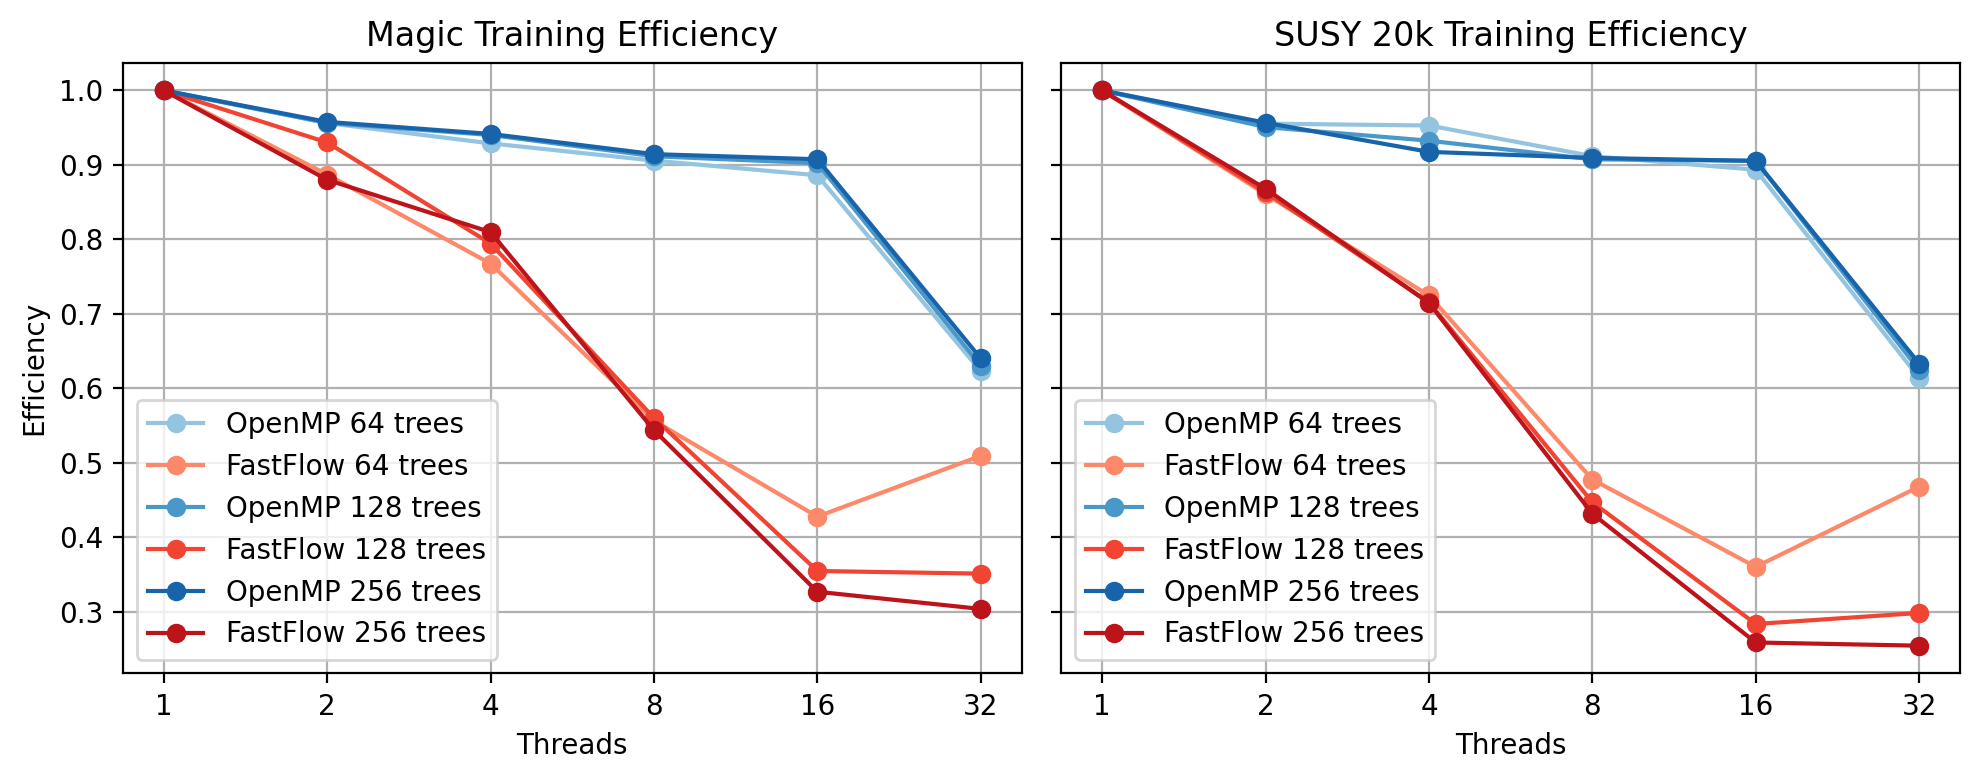

In [10]:
plot.training_efficiency(df, 64)

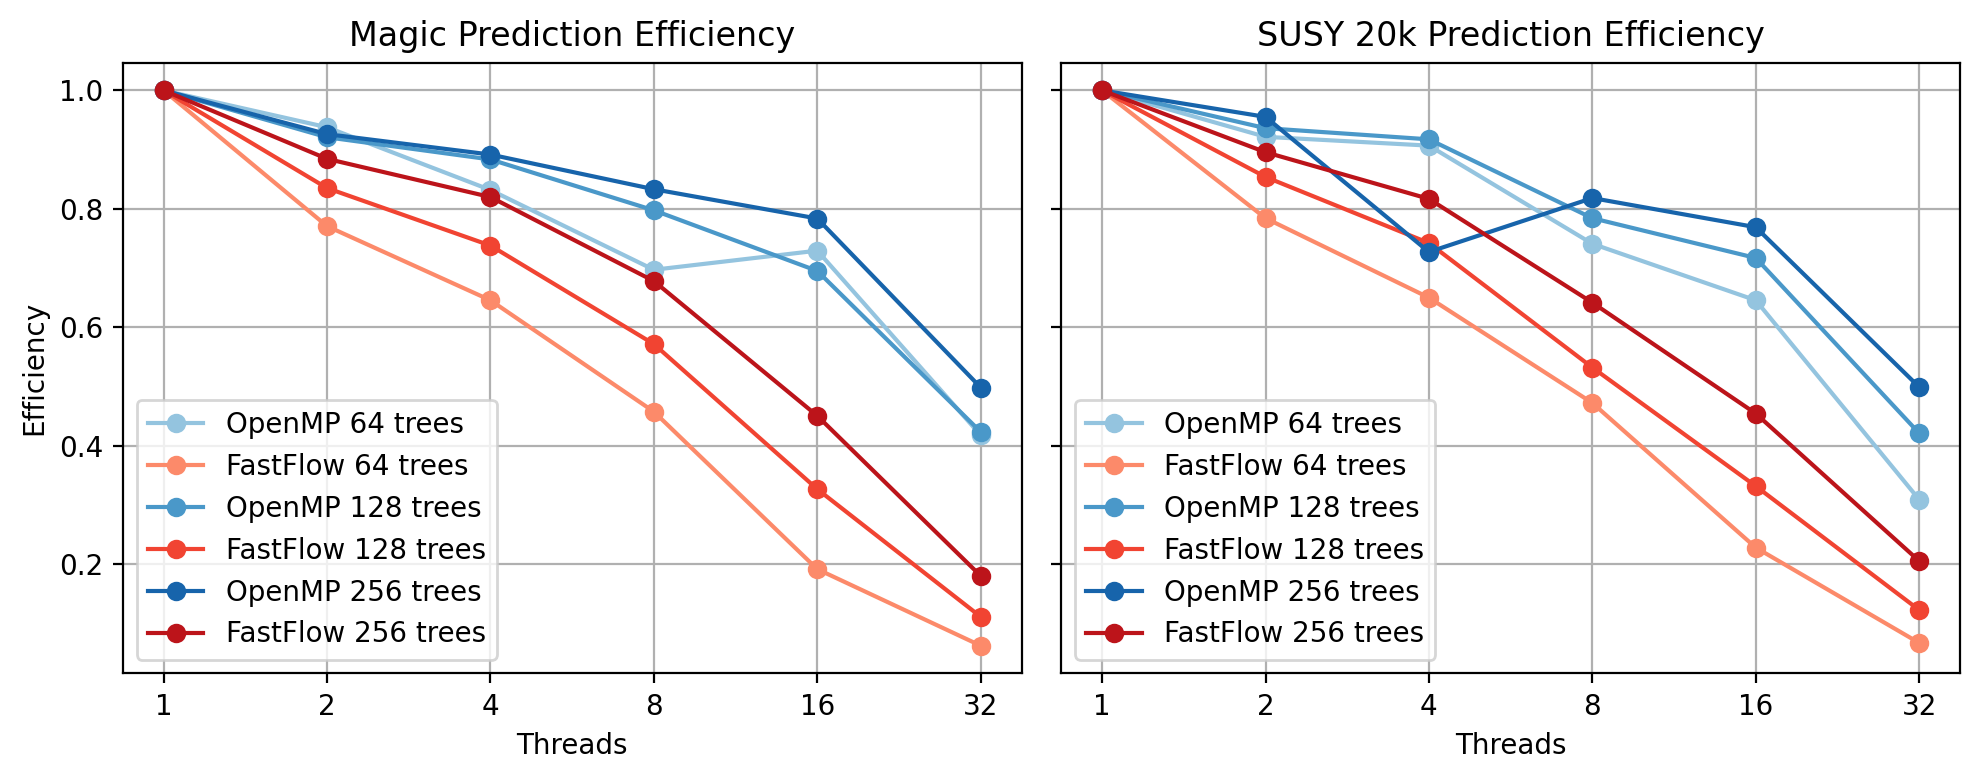

In [11]:
plot.prediction_efficiency(df, 64)

## Weak Scaling

Weak scaling computed as a relative speedup in order to normalize it and have a
fair comparison.

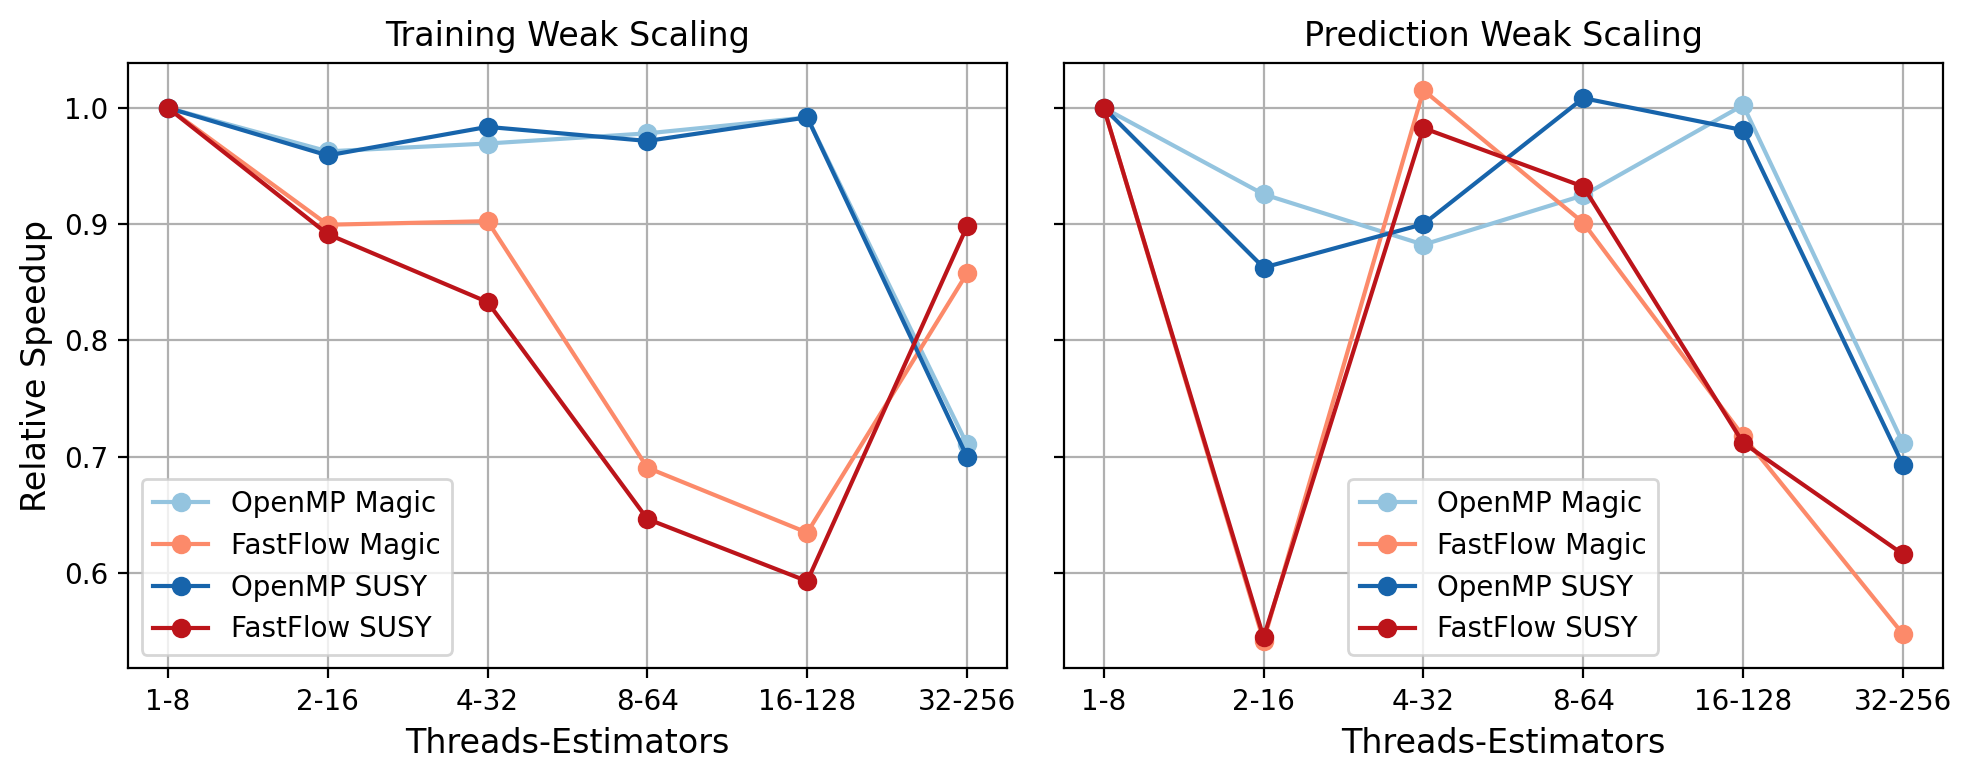

In [12]:
plot.weak_scaling(df)